# JURNAL MODUL VII

import numpy merupakan library di mana disimpan sebagai np yang berfungsi untuk dapat menampilkan array. import matplotlib.pyplot merupakan library di mana disimpan sebagai plt yang berfungsi untuk dapat menampilkan gambar yang di import ke dalam python. import cv2 yang berfungsi untuk melakukan konversi color space. 

In [86]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Fungsi dibawah ini digunakan untuk membaca citra dengan nama file '1975.jpg' dan mengubah citra dari format BGR ke skala abu-abu menggunakan OpenCV. Lalu menampilkan dengan Parameter cmap="gray" .

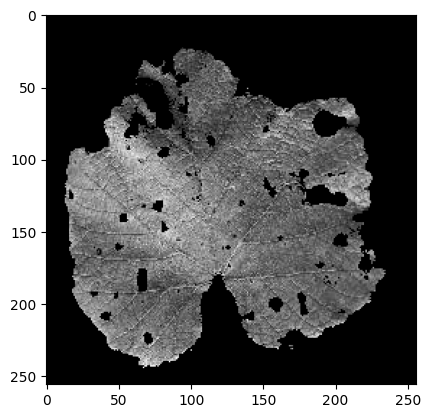

In [87]:
img = cv2.imread('anggur.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

Fungsi dibawah ini digunakan untuk mengubah nilai piksel citra menjadi 1 jika nilai piksel awalnya lebih besar dari 128, dan menjadi 0 jika nilai piksel awalnya kurang dari atau sama dengan 128. Fungsi ini menggunakan NumPy.

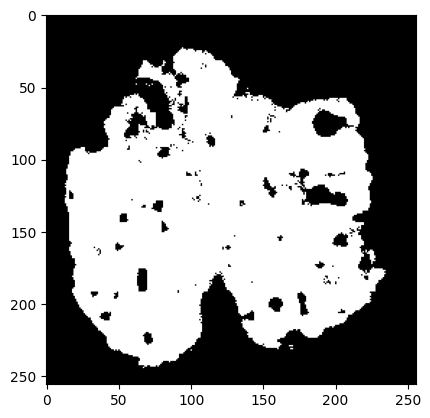

In [88]:
img_bin = np.where(img > 1, 1, 0)
plt.imshow(img_bin, cmap='gray')

Fungsi dibawah ini digunakan untuk membuat kernel berukuran 5x5 dengan tipe data np.uint8. Kernel ini digunakan dalam operasi morfologi.

In [89]:
kernel = np.ones((3, 3), np.uint8)

In [90]:
img_dilation = np.zeros_like(img_bin)
img_erosion = np.zeros_like(img_bin)
img_opening = np.zeros_like(img_bin)
img_closing = np.zeros_like(img_bin)

Fungsi dilasi dilakukan dengan menggunakan nested loop untuk memindahkan kernel pada setiap piksel yang memiliki nilai 1. Jika ada piksel dalam kernel yang berdekatan dengan piksel bernilai 1, maka piksel tersebut diatur menjadi 1 dalam citra hasil dilasi.

In [91]:
#dilasi
for i in range(img_bin.shape[0]):
    for j in range(img_bin.shape[1]):
        if img_bin[i, j] == 1:
            for k in range(-1, 2):
                for l in range(-1, 2):
                    if i + k >= 0 and i + k < img_bin.shape[0] and j + l >= 0 and j + l < img_bin.shape[1]:
                        img_dilation[i + k, j + l] = 1

Fungsi erosi dilakukan dengan menggunakan nested loop untuk memeriksa piksel di sekitar setiap piksel yang memiliki nilai 1. Jika ada piksel di sekitarnya yang bernilai 0, maka piksel tersebut diatur menjadi 0 dalam citra hasil erosi.

In [92]:
# Erosi
for i in range(img_bin.shape[0]):
    for j in range(img_bin.shape[1]):
        for k in range(-1, 2):
            for l in range(-1, 2):
                if i + k >= 0 and i + k < img_bin.shape[0] and j + l >= 0 and j + l < img_bin.shape[1]:
                    if img_bin[i + k, j + l] != 1:
                        img_erosion[i, j] = 0
                        break
            else:
                continue
            break
        else:
            img_erosion[i, j] = 1

Fungsi opening merupakan kombinasi erosi diikuti dengan dilasi. Fungsi ini dilakukan dengan menggunakan nested loop dan memeriksa piksel di sekitar setiap piksel yang memiliki nilai 1 dalam citra erosi. Jika ada piksel di sekitarnya yang bernilai 0, maka piksel tersebut diatur menjadi 0 dalam citra hasil opening.

In [93]:
# Opening
for i in range(img_bin.shape[0]):
    for j in range(img_bin.shape[1]):
        for k in range(-1, 2):
            for l in range(-1, 2):
                if i + k >= 0 and i + k < img_bin.shape[0] and j + l >= 0 and j + l < img_bin.shape[1]:
                    if img_erosion[i + k, j + l] != 1:
                        img_opening[i, j] = 0
                        break
            else:
                continue
            break
        else:
            img_opening[i, j] = 1

Fungsi closing merupakan kombinasi dilasi diikuti dengan erosi. Fungsi ini dilakukan dengan menggunakan nested loop dan memeriksa piksel di sekitar setiap piksel yang memiliki nilai 1 dalam citra dilasi. Jika ada piksel di sekitarnya yang bernilai 0, maka piksel tersebut diatur menjadi 0 dalam citra hasil closing.

In [94]:
# Closing
for i in range(img_bin.shape[0]):
    for j in range(img_bin.shape[1]):
        if img_dilation[i, j] != 1:
            img_closing[i, j] = 0
        else:
            for k in range(-1, 2):
                for l in range(-1, 2):
                    if i + k >= 0 and i + k < img_bin.shape[0] and j + l >= 0 and j + l < img_bin.shape[1]:
                        if img_dilation[i + k, j + l] != 1:
                            img_closing[i, j] = 0
                            break
                else:
                    continue
                break
            else:
                img_closing[i, j] = 1

" plt.subplot(4, 2, 1) hingga plt.subplot(4, 2, 3): "Fungsi-fungsi ini digunakan untuk membuat subplot dalam satu gambar plot dengan ukuran 4x2. Setiap hasil operasi morfologi (erosi, dilasi, opening, closing, dan gradien) ditampilkan dalam subplot yang berbeda.
plt.tight_layout():
Fungsi ini digunakan untuk mengatur tata letak plot agar tampil dengan rapi.
plt.show():
Fungsi ini digunakan untuk menampilkan plot hasil operasi morfologi.

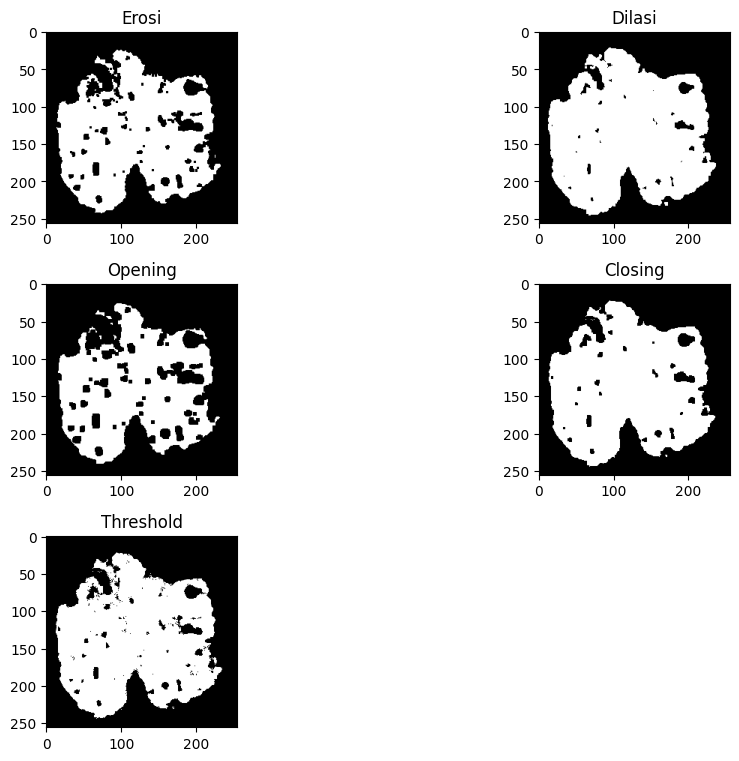

In [95]:
plt.figure(figsize=(10, 10))

plt.subplot(4, 2, 1)
plt.title('Erosi')
plt.imshow(img_erosion, cmap="gray")

plt.subplot(4, 2, 2)
plt.title('Dilasi')
plt.imshow(img_dilation, cmap="gray")

plt.subplot(4, 2, 3)
plt.title('Opening')
plt.imshow(img_opening, cmap="gray")

plt.subplot(4, 2, 4)
plt.title('Closing')
plt.imshow(img_closing, cmap="gray")

plt.subplot(4, 2, 5)
plt.title('Threshold')
plt.imshow(img_bin, cmap="gray")

plt.tight_layout()
plt.show()